## a)

In [1]:
#Bütikofer Kevin, Charles-Lewis Jaggi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
data_train = pd.read_csv("student-dataset-train.csv", names = ["x1","x2","y"])


x1_train = data_train["x1"].values
x2_train = data_train["x2"].values
y_train = data_train["y"].values

N = len(x1_train)
x_bias = np.ones((N,1))
x1_train = np.reshape(x1_train,(N,1))
x2_train = np.reshape(x2_train,(N,1))

X = np.c_[x_bias,x1_train, x2_train]

print("shape X : ",np.shape(X))
print("shape y : ",np.shape(y_train))

shape X :  (100, 3)
shape y :  (100,)


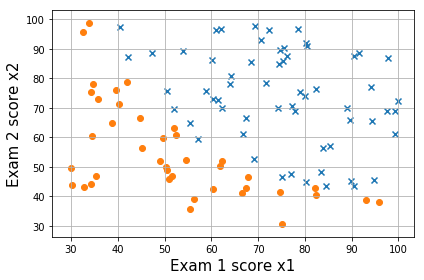

In [2]:
fig, ax = plt.subplots()
passed = np.array([X[i,(1,2)] for i in range(N) if y_train[i] == 1])
failed = np.array([X[i,(1,2)] for i in range(N) if y_train[i] == 0])

ax.scatter(passed[:,0], passed[:,1], marker='x')
ax.scatter(failed[:,0], failed[:,1], marker='o')

ax.set_xlabel('Exam 1 score x1', fontsize=15)
ax.set_ylabel('Exam 2 score x2', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show()

In [3]:
znorm = lambda data : (data - np.mean(data))/np.var(data)

## b)

In [4]:
X_norm = np.copy(X)
X_norm[:,1] = znorm(X_norm[:,1])
X_norm[:,2] = znorm(X_norm[:,2])

## c)

In [5]:
sigmoid = lambda z: 1/(1+ np.exp(-z)) 

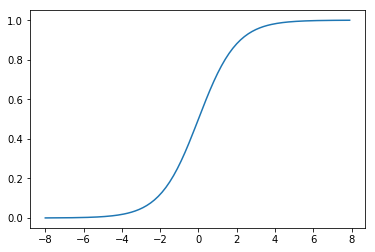

In [6]:
z = np.arange(-8., 8., 0.1)

plt.plot(z, sigmoid(z))

## d)

In [7]:
hypothesis = lambda X,thetas : sigmoid(np.dot(X,thetas))

## e)

In [8]:
 j_theta = lambda N,y,thetas,h : 1/N * np.sum(y*np.log(h) + (1-y)*np.log(1-h))

## f)

In [9]:
def gradientAscent(X, y, learning_rate, nb_epoch):
    N = X.shape[0] #taille des données
    D = X.shape[1] # dimension
    thetas = np.zeros(D)
    J = np.zeros(nb_epoch)
    for i in range(nb_epoch):
        h = hypothesis(X, thetas)
        J[i] = j_theta(N,y,thetas,h)
        loss = y - h
        gradient = loss.dot(X)
        thetas = thetas + learning_rate * (1.0/N) * gradient
    return J, thetas

## g)

[-19.08468795   0.15767916   0.15228738]


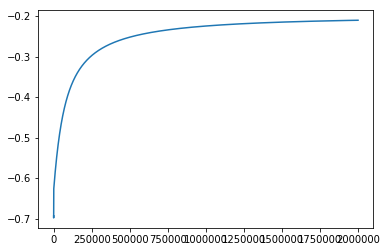

In [10]:
alpha = 0.001
nb_epoch = 2000000
J, thetas = gradientAscent(X, y_train, alpha, nb_epoch)
print (thetas)
plt.plot(J)

[ 0.53651534 17.73592464 15.93853026]


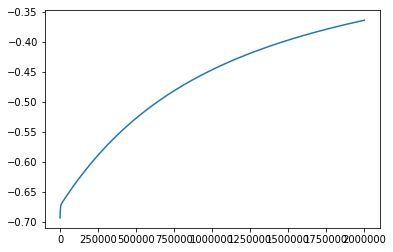

In [11]:
J_norm, thetas_norm = gradientAscent(X_norm, y_train, alpha, nb_epoch)
print (thetas_norm)
plt.plot(J_norm)

## h)

In [12]:
data_test = pd.read_csv("student-dataset-test.csv", names = ["x1","x2","y"])


x1_test = data_test["x1"].values
x2_test = data_test["x2"].values
y_test = data_test["y"].values

N = len(x1_test)
x_bias = np.ones((N,1))
x1_test = np.reshape(x1_test,(N,1))
x2_test = np.reshape(x2_test,(N,1))

X_test = np.c_[x_bias,x1_test, x2_test]

h_test = hypothesis(X_test,thetas)

h_res = h_test >= 0.5
correct = np.sum(h_res == y_test)
print("correct : ",correct)
print("rate : " , correct/N)

correct :  89
rate :  0.89


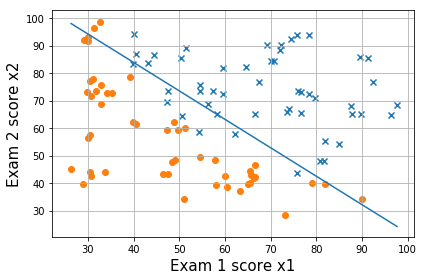

In [13]:
fig, ax = plt.subplots()
passed = np.array([X_test[i,(1,2)] for i in range(N) if y_test[i] == 1])
failed = np.array([X_test[i,(1,2)] for i in range(N) if y_test[i] == 0])

ax.scatter(passed[:,0], passed[:,1], marker='x')
ax.scatter(failed[:,0], failed[:,1], marker='o')

x1 = np.linspace(np.min(X_test[:,1]), np.max(X_test[:,1]), 100)
x2 = (-thetas[0] - thetas[1]*x1)/thetas[2]
plt.plot(x1, x2)


ax.set_xlabel('Exam 1 score x1', fontsize=15)
ax.set_ylabel('Exam 2 score x2', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show()

In [14]:
X_norm_test = np.copy(X_test)
X_norm_test[:,1] = znorm(X_norm_test[:,1])
X_norm_test[:,2] = znorm(X_norm_test[:,2])

In [15]:
h_norm_test = hypothesis(X_norm_test,thetas_norm)

h_res_norm = h_norm_test >= 0.5
correct = np.sum(h_res_norm == y_test)
print("correct : ",correct)
print("rate : " , correct/N)

correct :  90
rate :  0.9


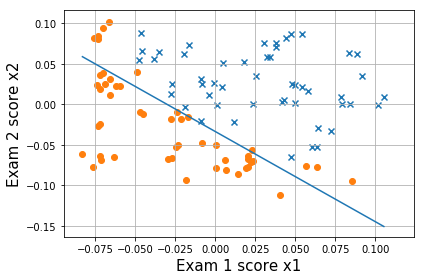

In [16]:
fig, ax = plt.subplots()
passed = np.array([X_norm_test[i,(1,2)] for i in range(N) if y_test[i] == 1])
failed = np.array([X_norm_test[i,(1,2)] for i in range(N) if y_test[i] == 0])

ax.scatter(passed[:,0], passed[:,1], marker='x')
ax.scatter(failed[:,0], failed[:,1], marker='o')

x1 = np.linspace(np.min(X_norm_test[:,1]), np.max(X_norm_test[:,1]), 100)
x2 = (-thetas_norm[0] - thetas_norm[1]*x1)/thetas_norm[2]
plt.plot(x1, x2)


ax.set_xlabel('Exam 1 score x1', fontsize=15)
ax.set_ylabel('Exam 2 score x2', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show()

## j)

Score Bayes histogram x1, x2 : 88.0

Score BayesUnivariate Gaussian distribution x1, x2 : 89.0

Score LogisticRegression : 89.0

Score LogisticRegression Normalised : 90.0

## Using SciKit Learn

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import linear_model

clf = linear_model.SGDClassifier(max_iter=2000000, tol=1e-3, loss='log').fit(X_norm, y_train)
y_pred_sklearn = clf.predict(X_norm_test)
print("accuracy_score: ", accuracy_score(y_test, y_pred_sklearn))
parameters = clf.coef_[0]
print(parameters)

accuracy_score:  0.81
[-0.91760396 44.59831524 38.33142129]


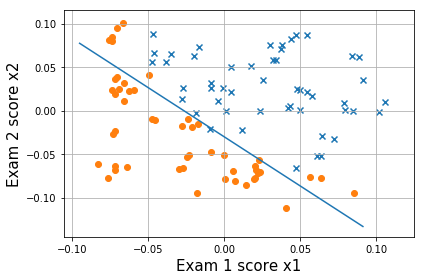

In [54]:
fig, ax = plt.subplots()

ax.scatter(passed[:,0], passed[:,1], marker='x')
ax.scatter(failed[:,0], failed[:,1], marker='o')

x1 = np.linspace(np.min(X_norm[:,1]), np.max(X_norm[:,1]), 100)
x2 = (-parameters[0] - parameters[1]*x1)/parameters[2]
plt.plot(x1, x2)


ax.set_xlabel('Exam 1 score x1', fontsize=15)
ax.set_ylabel('Exam 2 score x2', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show()

Scikit learn SGDCClassifier score can be very good 90% but sometimes very bad 60%